In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#Call variables from data cleaning process
%store -r df
df = df

%store -r cat_columns
cat_columns = cat_columns

%store -r numeric_columns
numeric_columns = numeric_columns


## Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

In [3]:
# Plot feature distribution with mean and median
def kde_plot(col):
    plt.figure(figsize=(12, 3))

    # Histogram with KDE curve
    sns.histplot(df[col], kde=True, stat="density", alpha=0.3)

    # Central tendency metrics
    mean = df[col].mean()
    median = df[col].median()

    # Vertical reference lines
    plt.axvline(mean, color="black", linestyle="--", label="Mean")
    plt.axvline(median, color="green", linestyle="--", label="Median")

    plt.legend()
    plt.title(f"Distribution of {col}")
    plt.show()

This function visualizes the distribution of a numerical feature using a histogram
with a KDE curve. The mean and median are overlaid to assess skewness and outliers.

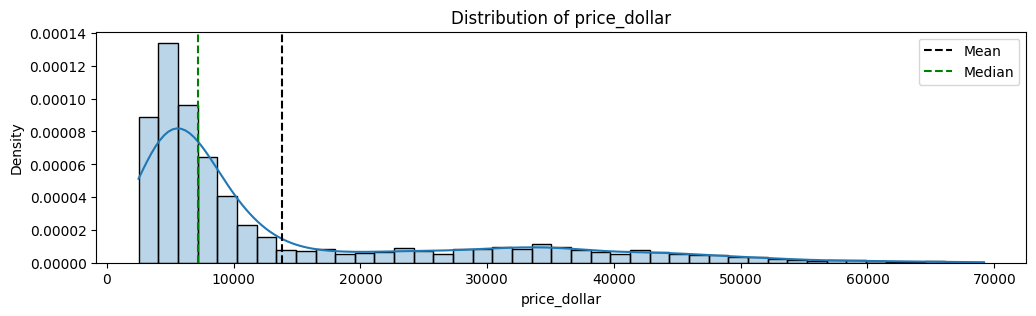

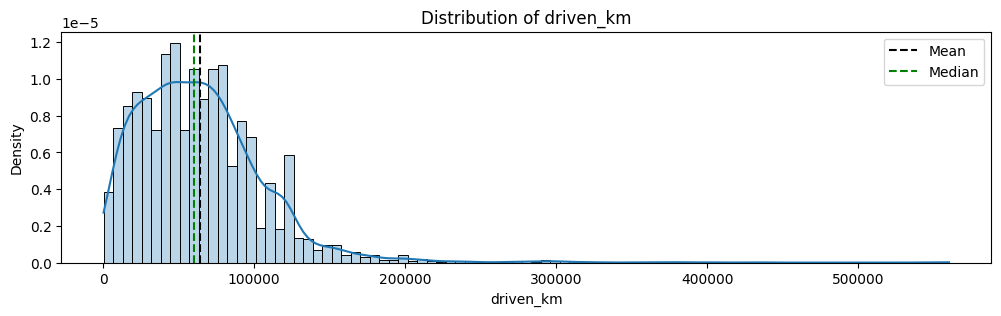

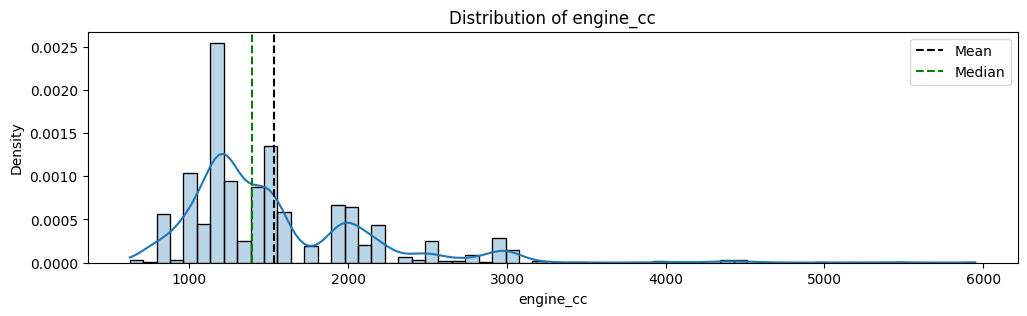

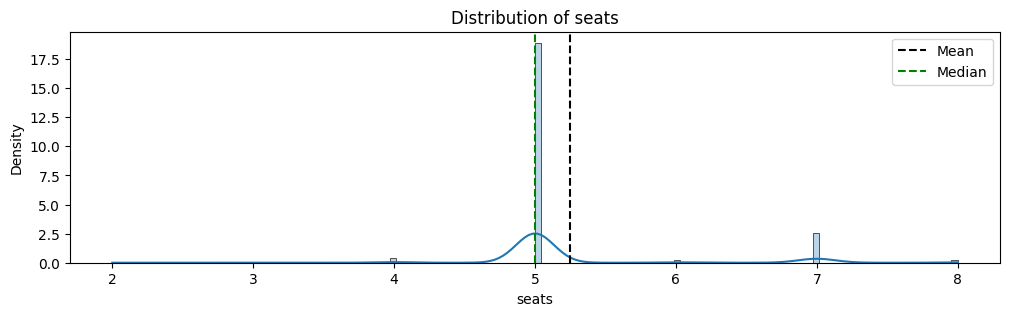

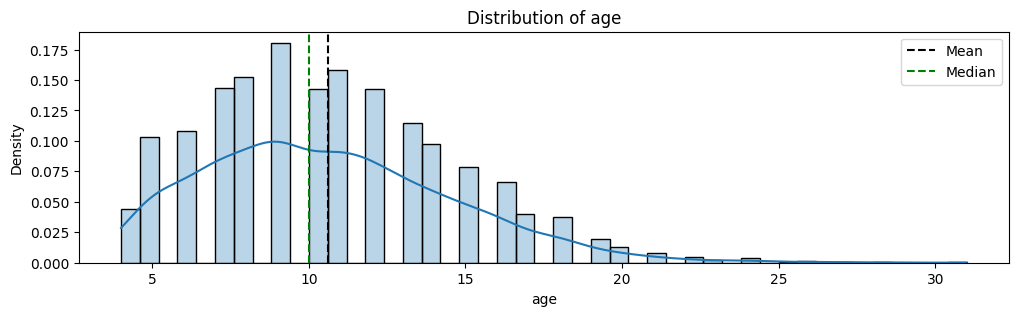

In [4]:
kde_plot("price_dollar")
kde_plot("driven_km")
kde_plot("engine_cc")
kde_plot("seats")
kde_plot("age")

Most numerical features show right-skewed distributions.
The median is generally preferred over the mean for imputation due to outliers.
Age is well-distributed.

### Distribution of categorical variables

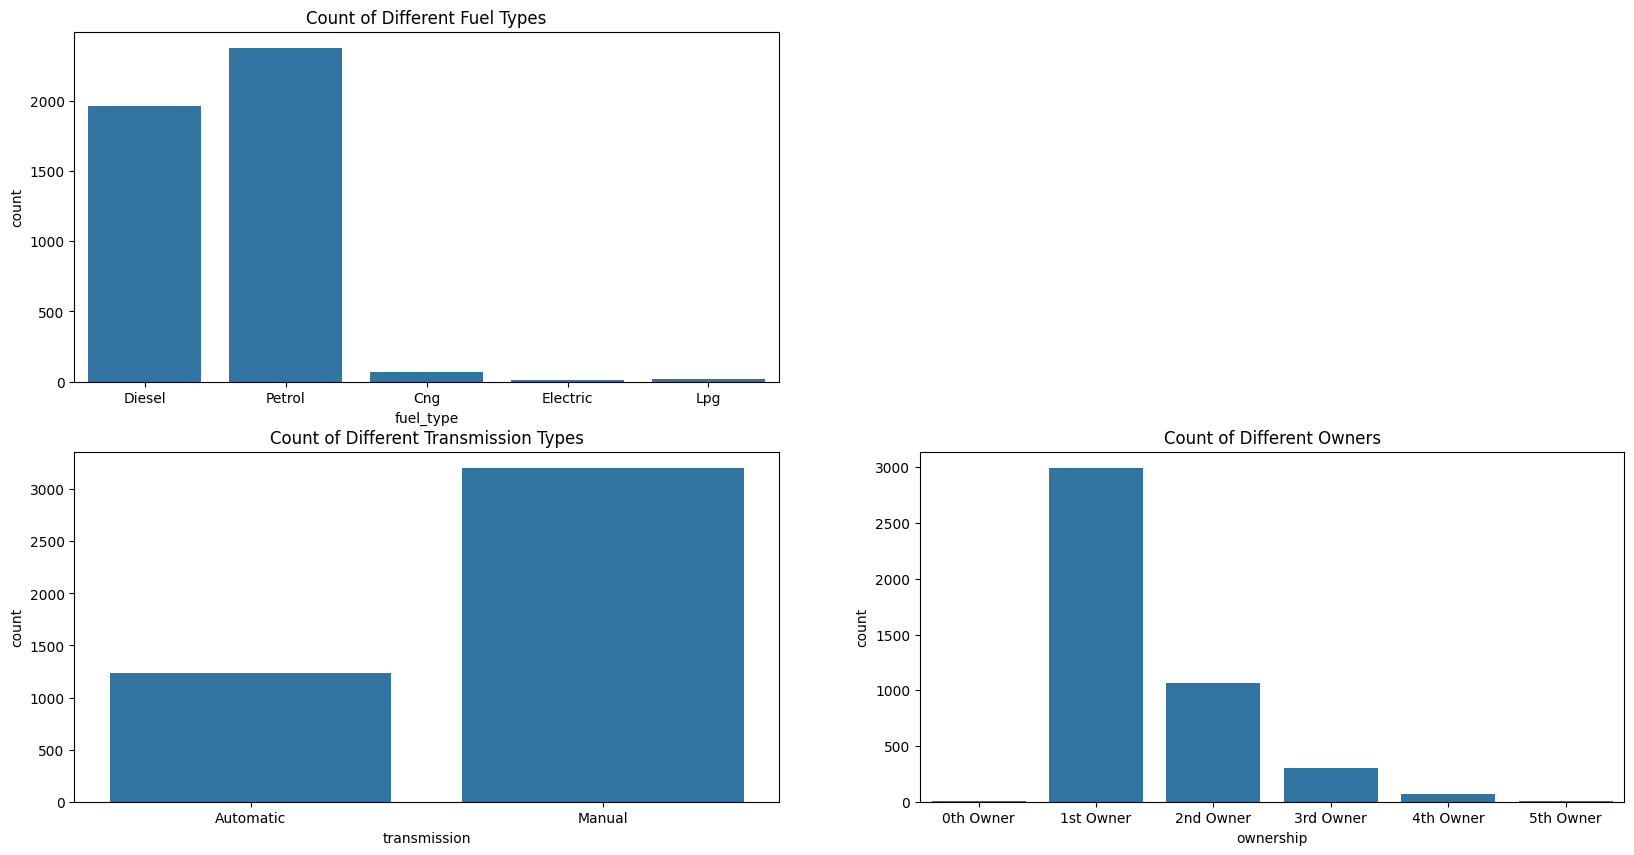

In [6]:
# Chart - 2 Count plot visualization code for Categorical Variable
# Create a 2x2 subplot
order = sorted(df["ownership"].unique(), key=lambda x: int(x.split("th")[0][0]))
plt.figure(figsize=(20,10))

# Subplot 1: Count of different Fuel Types
plt.subplot(2,2,1)
sns.countplot(data=df, x = 'fuel_type')
plt.title("Count of Different Fuel Types")

# Subplot 2: Count of different Transmission Types
plt.subplot(2,2,3)
sns.countplot(data=df, x = 'transmission')
plt.title("Count of Different Transmission Types")

# Subplot "4": Count of different Owners
plt.subplot(2,2,4)
sns.countplot(data=df, x = 'ownership', order=order)
plt.title("Count of Different Owners")

# Display the plot
plt.show()

Categorical feature distributions reveal class imbalance.
Fuel type is target-encoded due to rare categories.
Transmission is binary-encoded, while ownership is ordinally encoded
to preserve its natural ordering.

### Categorical Variable vs Target Variable

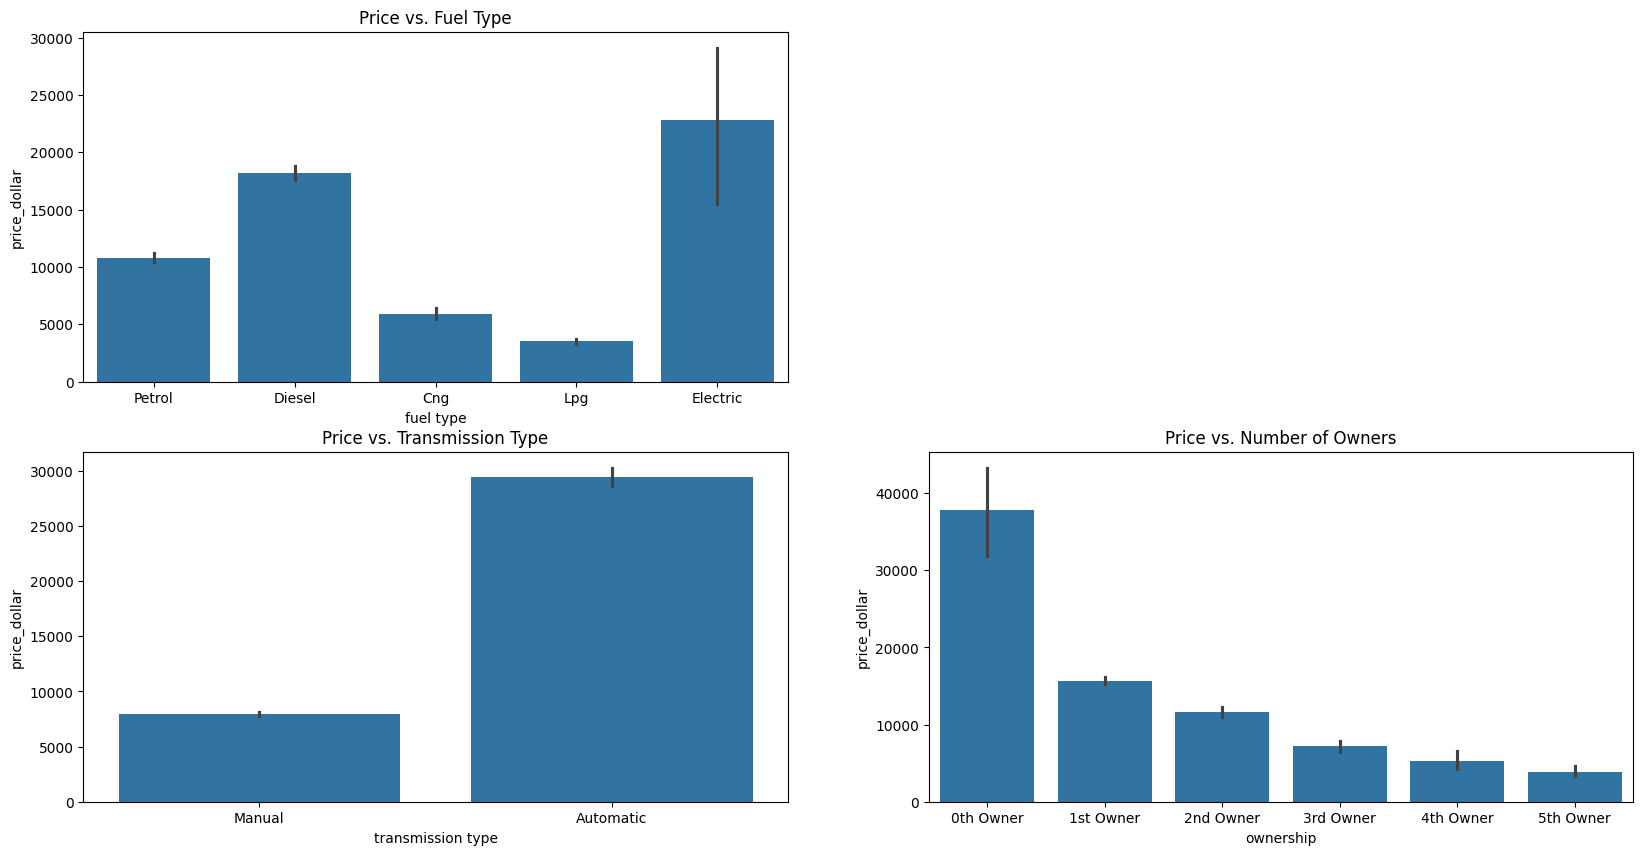

In [170]:
# Chart Barplot visualization code for categorical variable vs target variable
# Create a 2x2 subplot
order = sorted(df["ownership"].unique(), key=lambda x: int(x.split("th")[0][0]))
plt.figure(figsize=(20,10))

# Subplot 1: Barplot for price_dollar vs. Fuel_Type
plt.subplot(2,2,1)
sns.barplot(data=df, x='fuel_type', y='price_dollar')
plt.xlabel('fuel type')
plt.ylabel('price_dollar')
plt.title('Price vs. Fuel Type')

# Subplot 2: Barplot for Selling_Price vs. Transmission
plt.subplot(2,2,3)
sns.barplot(data=df, x='transmission', y='price_dollar')
plt.xlabel('transmission type')
plt.ylabel('price_dollar')
plt.title('Price vs. Transmission Type')

# Subplot 3: Barplot for Selling_Price vs. Owner
plt.subplot(2,2,4)
sns.barplot(data=df, x='ownership', y='price_dollar', order = order)
plt.xlabel('ownership')
plt.ylabel('price_dollar')
plt.title('Price vs. Number of Owners')

# Display the plot
plt.show()

<Axes: xlabel='ownership', ylabel='price_dollar'>

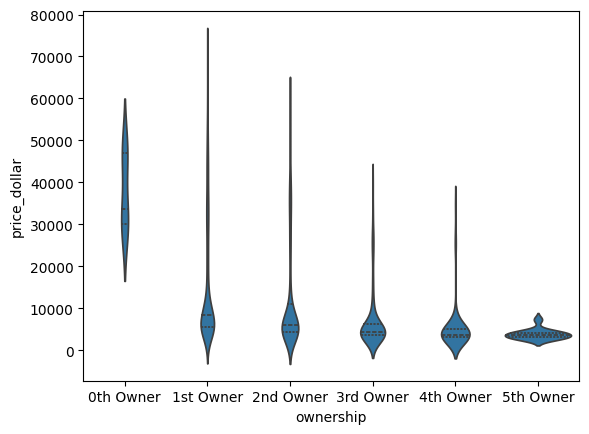

In [171]:
#Zoom in the behavier of the ownership data
sns.violinplot(data=df, x="ownership", y="price_dollar", inner="quartile", order= order)

1. 0th Owner

- Prices are significantly higher than all other ownership categories.
- The distribution is wide, indicating both mid-range and very high-priced vehicles.
- High upper tail suggests the presence of premium or luxury vehicles.
- This confirms that vehicles with no previous owners retain the highest market value.

2. 1st and 2nd Owner

- A sharp drop in price is observed compared to 0th owner vehicles.
- Distributions are right-skewed, meaning most cars are priced low, with a few expensive outliers.
- Large vertical spread indicates high variability, possibly due to differences in brand, condition, and mileage.
- These categories represent the core of the used-car market.

3. 3rd and 4th Owner

- Prices are further reduced, with tighter distributions.
- Most vehicles are clustered in the lower price range, showing reduced resale appeal.
- Fewer high-price outliers appear, suggesting limited premium options in these categories.

4. 5th Owner

- This category shows the lowest prices and the narrowest distribution.
- Prices are highly concentrated at the lower end, indicating heavy depreciation.
- Almost no high-value vehicles exist in this group, reflecting low buyer confidence.

# Numerical Variable vs Target Variable

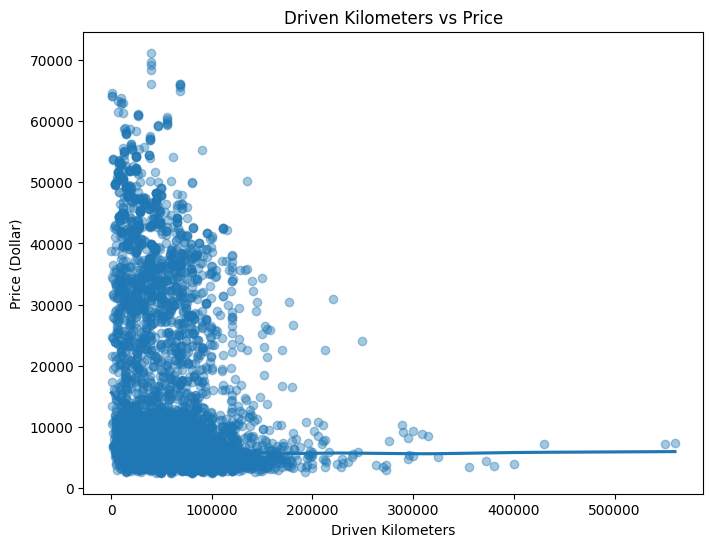

In [ ]:
# Visualize the relationship between driven kilometers and price 
# with a LOWESS curve to capture non-linear trends
plt.figure(figsize=(8,6))

sns.regplot(
    data=df,
    x="driven_km",
    y="price_dollar",
    lowess=True,                 # Non-linear trend smoothing
    scatter_kws={"alpha": 0.4}   # Transparency to reduce overplotting
)

# Add title and axis labels
plt.title("Driven Kilometers vs Price")
plt.xlabel("Driven Kilometers")
plt.ylabel("Price (Dollar)")

plt.show()

Mileage has a strong non-linear negative impact on price, with diminishing effects at high kilometer values

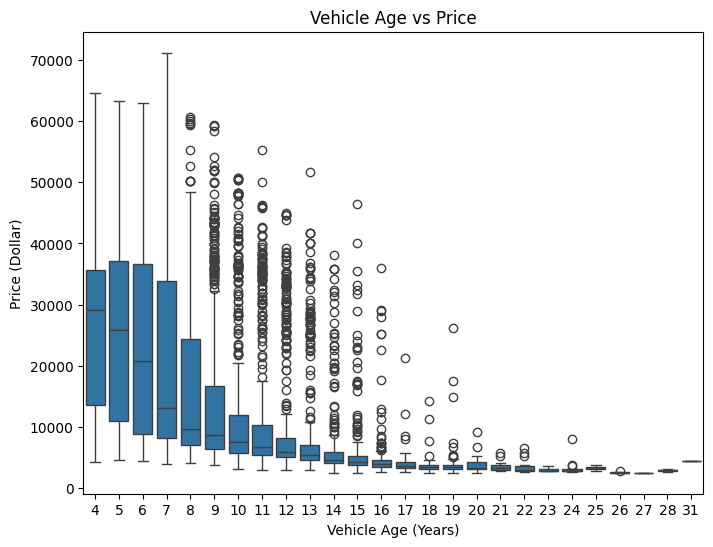

In [ ]:
# Create a boxplot to analyze the relationship between vehicle age and price
plt.figure(figsize=(8,6))

sns.boxplot(
    data=df,
    x="age",
    y="price_dollar"
)

# Add title and axis labels for clarity
plt.title("Vehicle Age vs Price")
plt.xlabel("Vehicle Age (Years)")
plt.ylabel("Price (Dollar)")

plt.show()

Vehicle age shows a strong inverse relationship with price.
Younger vehicles have higher and more variable prices,
while older vehicles converge toward lower and more stable values.
This might be a sign age is an important predictive feature.

#  Correlation Analysis

### Numerical data : Pearson correlation analyses

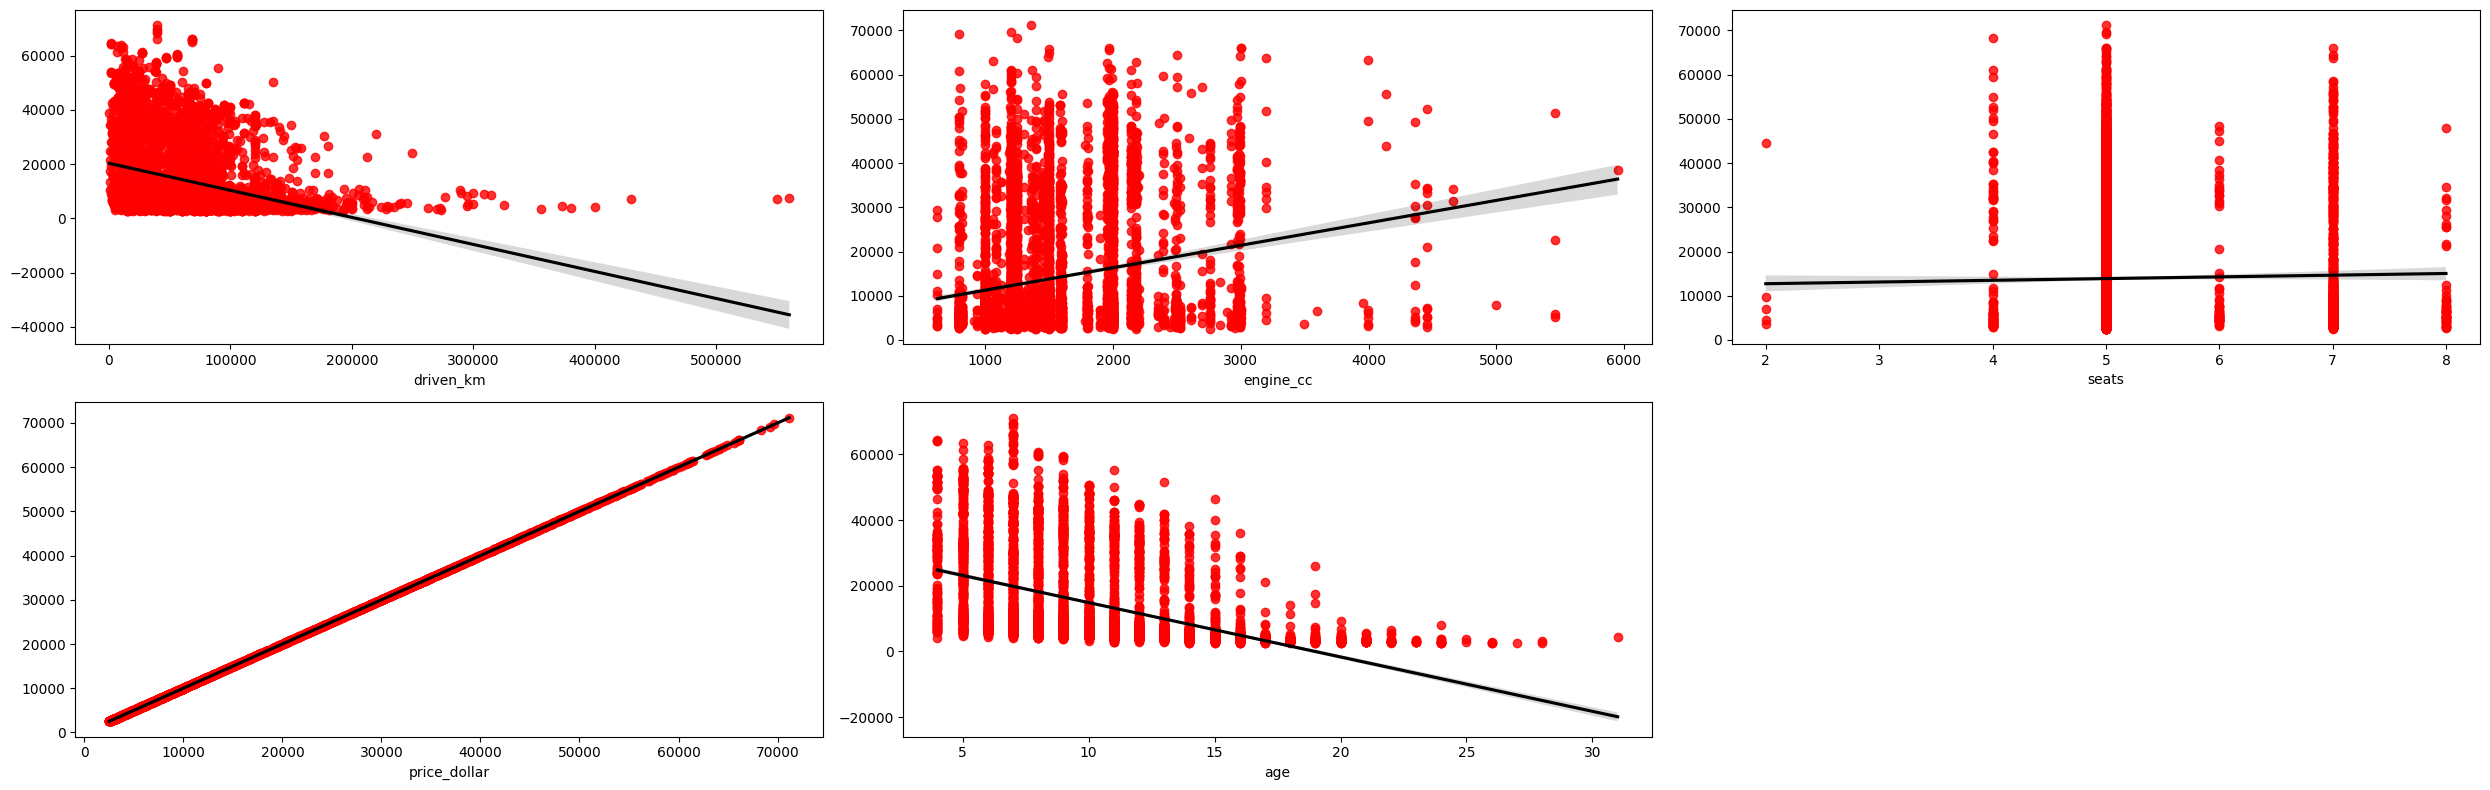

In [ ]:
# Create a grid of subplots to analyze relationships
# between numerical features and the target variable
fig, axes = plt.subplots(2, 3, figsize=(25, 8))
axes = axes.ravel()

# Loop through numerical columns and plot regression
for i, col in enumerate(numeric_columns):
    sns.regplot(
        x=col,
        y="price_dollar",
        data=df,
        ax=axes[i],
        scatter_kws={"color": "red"},   # Data points
        line_kws={"color": "black"}     # Regression line
    )

    axes[i].set_xlabel(col)
    axes[i].set_ylabel("")

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The Pearson correlation analysis indicates a heavy clustering at low mileage → most cars are in this range and that vehicle price is strongly negatively correlated with both driven kilometers and vehicle age, reflecting depreciation due to usage and time. Engine capacity shows a moderate positive correlation with price, while the number of seats exhibits little to no linear relationship. These results suggest that usage-related variables are the most influential numerical predictors of vehicle price.

### Pearson Heatmap

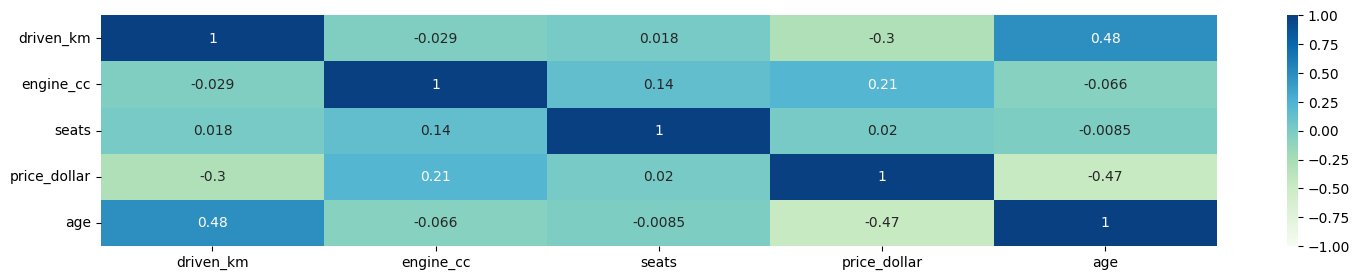

In [ ]:
# Compute Pearson correlation matrix for numerical features
pearson_cor = df[numeric_columns].corr(method="pearson")

# Plot correlation heatmap
plt.figure(figsize=(18, 3))
sns.heatmap(
    pearson_cor,
    vmin=-1,
    vmax=1,
    cmap="GnBu",
    annot=True         
)

plt.show()


Pearson correlation analysis highlights age and driven kilometers as the strongest numerical predictors of price. Moderate correlation between age and mileage suggests partial collinearity, but both features provide complementary information.

### Catigorical data ANOVA

In [ ]:
# Perform one-way ANOVA to test whether each categorical variable
# has a statistically significant effect on the target variable (price_dollar)

anova_results = []

for i in cat_columns:
    # Build ANOVA formula: price_dollar explained by categorical variable
    formula = f'price_dollar ~ C({i})'
    
    # Fit OLS model
    model = ols(formula, data=df).fit()
    
    # Compute ANOVA table (Type II)
    anova = sm.stats.anova_lm(model, typ=2)
    
    # Extract p-value
    p_value = anova.iloc[0, 3]
    
    # Store results
    anova_results.append({
        "variable": i,
        "p_value": p_value,
        "significant": p_value < 0.05
    })

# Convert results to DataFrame
anova_df = pd.DataFrame(anova_results)
anova_df

,variable,p_value,significant
0,fuel_type,2.201245e-95,True
1,transmission,0.000000e+00,True
2,ownership,3.783073e-51,True
3,brand,0.000000e+00,True


All p-values are far below 0.05 it confirms that all categorical features have a statistically significant impact on the target variable. This validates their inclusion in the model and supports the chosen encoding strategies.